# Coding Practice \#2: Due February 14th at midnight in Canvas

file needed = 'monthly_loc_rides.csv', 'two_digit_by_port.csv', 'port_codes.csv'

Answer the questions below in a Jupyter notebook. You can modify this notebook by adding cells with your answers.

In [1]:
# Load packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 0: Linssen, Brandon
Replace 'Last, First' above with your actual name. Enter it as your last name, first name.

## Exercise 1: Nuclear Waste Cleanup

*Source:* This is a modification of a problem that Google often uses as a coding exam to recruit software engineers.

*Setup:* You are in charge of the U.S. nuclear waste cleanup program, and you are tasked with cleaning 1,000 units of nuclear waste. Your assignment is to identify the lowest cost cleanup method.

In order to clean up nuclear waste, you must manage the building and operation of nuclear cleanup sites around the country. These sites are expensive to both build and operate. In particular, the cost of building a cleanup site is $\$2,000,000$ and the cost per day of operation is $\$75,000$. It is expected that a site tasked with cleaning up $N$ units of waste will require $$N+0.01N^2$$ days of operation.

*How to assign waste to sites:* It turns out that the lowest cost strategy is to split the waste evenly across sites. In other words, if I choose to build 4 nuclear waste sites, then each of those four sites should clean exactly $1000/4=250$ units of nuclear waste.

*Your task:* Congress has capped the maximum number of nuclear waste sites at 10. Your job is find the number of nuclear waste sites that is associated with the lowest cost of cleaning up all 1,000 units of waste.

### Part (a):

You should write code to solve this problem. Here are the steps for the solution:

1. Loop over each possible number of sites and print out a nicely formatted answer like this: "If I build 4 nuclear cleanup sites, then each site will clean 250 units of nuclear waste."

In [2]:
for i in range (1,11):
    print(f'If I build {i} nuclear cleanup sites, then each site will clean {round(1000/i,2)} units of nuclear waste')

If I build 1 nuclear cleanup sites, then each site will clean 1000.0 units of nuclear waste
If I build 2 nuclear cleanup sites, then each site will clean 500.0 units of nuclear waste
If I build 3 nuclear cleanup sites, then each site will clean 333.33 units of nuclear waste
If I build 4 nuclear cleanup sites, then each site will clean 250.0 units of nuclear waste
If I build 5 nuclear cleanup sites, then each site will clean 200.0 units of nuclear waste
If I build 6 nuclear cleanup sites, then each site will clean 166.67 units of nuclear waste
If I build 7 nuclear cleanup sites, then each site will clean 142.86 units of nuclear waste
If I build 8 nuclear cleanup sites, then each site will clean 125.0 units of nuclear waste
If I build 9 nuclear cleanup sites, then each site will clean 111.11 units of nuclear waste
If I build 10 nuclear cleanup sites, then each site will clean 100.0 units of nuclear waste


2. For each possible number of sites, calculate the total cost of cleanup using the formula above.

In [3]:
for i in range (1,11):
    N = 1000 / i
    total_cost = round( 2000000*i + i*(75000*(N + 0.01*N**2 )),2)
    print(f'The total cost for cleanup of 1000 units of waste with {i} plants will cost a total of ${total_cost:,.2f}')

The total cost for cleanup of 1000 units of waste with 1 plants will cost a total of $827,000,000.00
The total cost for cleanup of 1000 units of waste with 2 plants will cost a total of $454,000,000.00
The total cost for cleanup of 1000 units of waste with 3 plants will cost a total of $331,000,000.00
The total cost for cleanup of 1000 units of waste with 4 plants will cost a total of $270,500,000.00
The total cost for cleanup of 1000 units of waste with 5 plants will cost a total of $235,000,000.00
The total cost for cleanup of 1000 units of waste with 6 plants will cost a total of $212,000,000.00
The total cost for cleanup of 1000 units of waste with 7 plants will cost a total of $196,142,857.14
The total cost for cleanup of 1000 units of waste with 8 plants will cost a total of $184,750,000.00
The total cost for cleanup of 1000 units of waste with 9 plants will cost a total of $176,333,333.33
The total cost for cleanup of 1000 units of waste with 10 plants will cost a total of $170,

3. What is the cost-minimizing number of sites? Use your coding skills and Python functions to keep track of the costs, find the minimum, and print out the optimal number of sites. Do not do this manually.

In [4]:
import numpy as np

best_cost = np.inf
opt_i = None

for i in range (1,11):
    N = 1000 / i
    total_cost = round( 2000000*i + i*( 75000*(N + 0.01*N**2) ),2)
    if total_cost < best_cost:
        best_cost = total_cost
        opt_i = i

print(f'The cost minizing number of sites is {opt_i}, which produces a total cost of ${best_cost:,.2f}')

The cost minizing number of sites is 10, which produces a total cost of $170,000,000.00


### Part (b):

Assume further that waste units are indivisible, so sites may not clean a fractional number of waste units. For example, you can not evenly divide 1,000 units across 3 sites without breaking up the units. So, building 3 sites is no longer an option.

Augment your code from part (a) to solve the modified problem. \[Hint: Consder using `a % b` which returns the remainder of $a \div b$.]

In [5]:
import numpy as np

best_cost = np.inf
opt_i = None

for i in range (1,11):
    N = 1000 / i
    if N.is_integer():
        total_cost = round( 2000000*i + i*( 75000*(N + 0.01*N**2) ),2)
        print(f'If I build {i} nuclear cleanup sites, then each site will clean {round(1000/i,2)} units of nuclear waste')
        
        if total_cost < best_cost:
            best_cost = total_cost
            opt_i = i

print(f'\nThe cost minizing number of sites is {opt_i}, which produces a total cost of ${best_cost:,.2f}')

If I build 1 nuclear cleanup sites, then each site will clean 1000.0 units of nuclear waste
If I build 2 nuclear cleanup sites, then each site will clean 500.0 units of nuclear waste
If I build 4 nuclear cleanup sites, then each site will clean 250.0 units of nuclear waste
If I build 5 nuclear cleanup sites, then each site will clean 200.0 units of nuclear waste
If I build 8 nuclear cleanup sites, then each site will clean 125.0 units of nuclear waste
If I build 10 nuclear cleanup sites, then each site will clean 100.0 units of nuclear waste

The cost minizing number of sites is 10, which produces a total cost of $170,000,000.00


## Exercise 2: Seaborn

The file `monthly_loc_rides.csv` is taken from [Chicago's Open Data Portal](https://data.cityofchicago.org/). The dataset is a monthly time-series by location on ride-sharing platforms in the city of Chicago. There are a few variables:
- `year` : the year of the ride
- `month` : the month of the ride
- `location` : the community area (location) of the origin of the ride
- `avg_fare` : how much Uber, Lyft, and other ride-share companies charged (average)
- `miles` : how far the ride was (in miles, average)
- `num_rides` : the number of rides in a month-location

The goal of this question is to use multiple visualization tools in the same figure, to understand the relationship between two variables.

### Part (a): Load the data

Read `monthly_loc_rides.csv` into a DataFrame named `monthly_loc_rides`. Make sure to drop observations where `location` is missing. How many observations were dropped? Print it out.

In [6]:
monthly_loc_rides = pd.read_csv('monthly_loc_rides.csv')
     
len_b = monthly_loc_rides.shape[0]                           # Length before
monthly_loc_rides.dropna(subset='location', inplace=True)    # Drop NaN observations in 'location' column
len_a = monthly_loc_rides.shape[0]                           # Length after
num_dropped = len_b - len_a                                  # Difference
num_dropped

50

### Part (b): Create a regplot

Use `seaborn` to explore the relationship between fares and distance. To begin, create a regplot of fares vs. distance, removing the top and right spines and making the markers in the scatterplot transparent (with some alpha less than .25). Comment on what you see. 

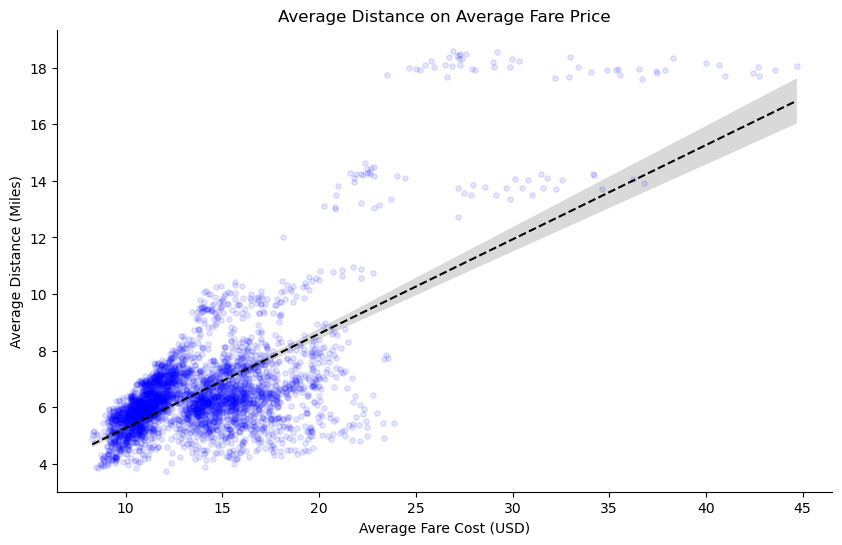

In [7]:
fig, ax = plt.subplots(figsize=(10,6)) 

sns.regplot(y='avg_miles',
            x='avg_fare',
            data=monthly_loc_rides,
            ax = ax,
            color = 'blue',
            scatter_kws={'s':15, 'alpha': 0.1},
            line_kws={'color': 'black', 'linewidth': 1.5, 'linestyle': '--'}
)

sns.despine(ax = ax)                             

ax.set_title('Average Distance on Average Fare Price')
ax.set_ylabel('Average Distance (Miles)')
ax.set_xlabel('Average Fare Cost (USD)')

plt.show()

Majority of observations are for rides shorter than 10 miles. Then there is another spike in rides 13-15 miles and then another at around 18 miles. The relationship does appear to be linear.

### Part (c): Create a bubble plot

Use the above exploration to create a new DataFrame that focuses on the data corresponding to the first peak of the travel distance distribution (i.e., observations with ~11 or less average distance). With that DataFrame, create a bubble plot of average fare vs. average miles, with a regplot overlaid. Use the following specifications: 
1. The x-axis should be average fare and the y-axis should be average miles.
2. Add a 95% confidence interval around a red regression line.
3. The bubble plot should be purple. Use alpha to make the bubbles lighter than the regression line.
4. Bubbles should be scaled proportionally to the number of rides.

Briefly comment on your results. What share of the original dataset's observations are in your new dataset? Does fare seem to scale linearly in price?

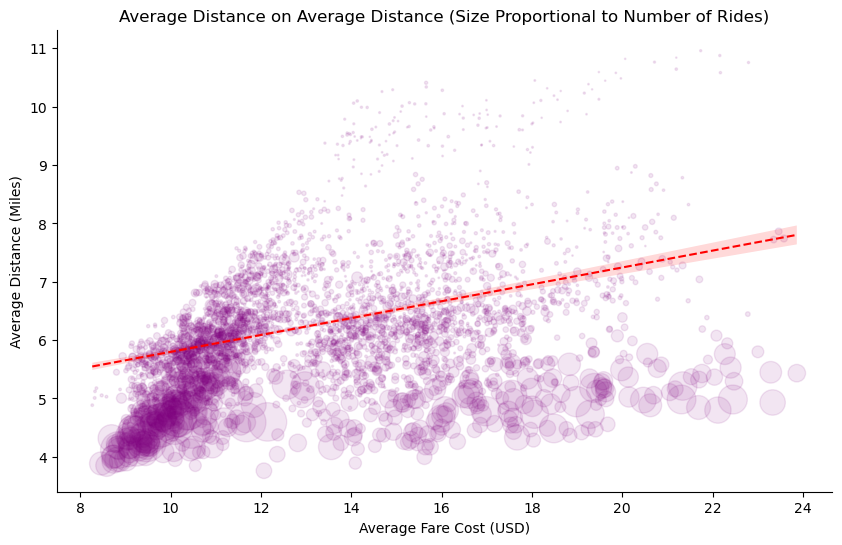

In [8]:
filtered_data = monthly_loc_rides[monthly_loc_rides['avg_miles'] <= 11]

fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(y='avg_miles', 
            x='avg_fare', 
            data=filtered_data, 
            ax=ax, 
            ci=95,
            scatter_kws={'s':filtered_data['num_rides']/2000, 'color': 'purple','alpha':0.1},
            line_kws={'color': 'red', 'linewidth': 1.5, 'linestyle': '--'})

sns.despine(ax=ax)

ax.set_title('Average Distance on Average Distance (Size Proportional to Number of Rides)')
ax.set_ylabel('Average Distance (Miles)')
ax.set_xlabel('Average Fare Cost (USD)')

plt.show()

In [9]:
original_size = monthly_loc_rides.shape[0]
filtered_size = filtered_data.shape[0]
share = filtered_size / original_size
print(f"Share of observations in the filtered dataset: {share:.2%}")

Share of observations in the filtered dataset: 97.43%


Yes it seems that the relationship between the two is linear. However there is a lot of noise in the data especially when the distance is aroun 4-7 miles causing the regression line to be higher than the percieved true regression line. This is likely due to the bias from busy times in cities causing short rides to be much higher than the common ride price of the same distance.

## Exercise 3: MultiIndex

Let's practice using a MultiIndex to select observations from data with multiple dimensions. The file 'two_digit_by_port.csv' contains U.S. the dollar value of imports by two-digit commodity code and port of entry for December 2013. 

For example, imports into port number 3703 (Green Bay, WI) of commodity 72 (Iron and Steel) were $9,208,917 in December 2013.

You can learn about port codes [here](https://www.census.gov/foreign-trade/schedules/d/distcode.html).<br>
The data were retrieved from the [Census trade API](https://www.census.gov/data/developers/data-sets/international-trade.html). 

### Part (a): Load the data

1. Load 'two_digit_by_port.csv' into a DataFrame.
2. Check the data types. `I_COMMODITY` should be integers and `GEN_VAL_YR` should be floats. All others should be objects.

In [10]:
port_data = pd.read_csv('two_digit_by_port.csv')
port_data.dtypes

PORT                  object
I_COMMODITY            int64
GEN_VAL_YR           float64
I_COMMODITY_SDESC     object
COMM_LVL              object
time                  object
dtype: object

### Part (b): Set up the index

1. Set the index to be `PORT`, `I_COMMODITY`, and `I_COMMODITY_SDESC`, in that order.
2. Sort the index and store as a new DataFrame called `part_b`.
3. Print out the first 3 and last 3 rows of `part_b`.

   Note that the `-` port is the total for all ports. This is why PORT is an object and not an int.

In [11]:
port_data.set_index(['PORT','I_COMMODITY','I_COMMODITY_SDESC'], inplace=True)
part_b = port_data.sort_index()

display(part_b.head(3))
display(part_b.tail(3))

GEN_VAL_YR  \
PORT I_COMMODITY I_COMMODITY_SDESC                                         
-    1           LIVE ANIMALS                               2.638842e+09   
     2           MEAT AND EDIBLE MEAT OFFAL                 5.844460e+09   
     3           FISH, CRUSTACEANS & AQUATIC INVERTEBRATES  1.389178e+10   

                                                           COMM_LVL     time  
PORT I_COMMODITY I_COMMODITY_SDESC                                            
-    1           LIVE ANIMALS                                   HS2  2013-12  
     2           MEAT AND EDIBLE MEAT OFFAL                     HS2  2013-12  
     3           FISH, CRUSTACEANS & AQUATIC INVERTEBRATES      HS2  2013-12

GEN_VAL_YR  \
PORT I_COMMODITY I_COMMODITY_SDESC                                        
6000 89          SHIPS, BOATS AND FLOATING STRUCTURES      1.143831e+07   
     98          SPECIAL CLASSIFICATION PROVISIONS, NESOI  2.401370e+05   
7070 99          SPECIAL IMPORT PROVISIONS, NESOI          1.344272e+10   

                                                          COMM_LVL     time  
PORT I_COMMODITY I_COMMODITY_SDESC                                           
6000 89          SHIPS, BOATS AND FLOATING STRUCTURES          HS2  2013-12  
     98          SPECIAL CLASSIFICATION PROVISIONS, NESOI      HS2  2013-12  
7070 99          SPECIAL IMPORT PROVISIONS, NESOI              HS2  2013-12

### Part (c): Indexing

1. Print out the row that corresponds to port = 3002 and commodity code = 95 (toys and games).

In [12]:
part_c = part_b.loc[('3002',95),:] 
part_c

,GEN_VAL_YR,COMM_LVL,time
I_COMMODITY_SDESC,,,
"TOYS, GAMES & SPORT EQUIPMENT; PARTS & ACCESSORIES",2.296905e+09,HS2,2013-12


### Part (d): Partial indexing
1. Retrieve all the rows that correspond to commodity code = 87 (Vehicles) and create a DataFrame from those rows named `part_d`. You might want to use the `.xs()` method here.
2. Print out the first 4 rows of `part_d`.

In [13]:
part_d = part_b.xs(87, level='I_COMMODITY', drop_level=False)
part_d.head(4)

,,,GEN_VAL_YR,COMM_LVL,time
PORT,I_COMMODITY,I_COMMODITY_SDESC,,,
-,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",2.490175e+11,HS2,2013-12
0101,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",4.715070e+05,HS2,2013-12
0102,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",2.496000e+03,HS2,2013-12
0104,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",1.705561e+07,HS2,2013-12


3. Drop the row that corresponds to port = '-' and store as a DataFrame called `part_d2`. 
4. Print out the first 4 rows of `part_d2`.

In [14]:
part_d2 = part_d.drop(index='-', level='PORT')
part_d2.head(4)

,,,GEN_VAL_YR,COMM_LVL,time
PORT,I_COMMODITY,I_COMMODITY_SDESC,,,
0101,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",471507.0,HS2,2013-12
0102,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",2496.0,HS2,2013-12
0104,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",17055613.0,HS2,2013-12
0106,87,"VEHICLES, EXCEPT RAILWAY OR TRAMWAY, AND PARTS ETC",21788600.0,HS2,2013-12


5. Report the total value of imports of vehicles from `part_d2`. Report the number using commas to separate the thousands and no digits to the right of the decimal point.

In [15]:
print(f'Total value of imports of vehicles: ${part_d2['GEN_VAL_YR'].sum():,.0f}')

Total value of imports of vehicles: $249,008,823,667


6. Report the total value of imports of vehicles reported by port = '-'. Report the number using commas to separate the thousands and no digits to the right of the decimal point.

In [16]:
print(f'Total value of imports of vehicles: ${part_d.loc['-','GEN_VAL_YR'].values[0]:,.0f}')

Total value of imports of vehicles: $249,017,542,957


Does it match your answer from part 5?

No.

## Ungraded Bonus Exercise: Merge

Let's walk through a merge example. We'll merge the data from the previous problem with data from 'port_codes.csv'.

### Part (a): Load the data and match the key types

1. Read in 'port_codes.csv' as `names`. Check the dtypes.

In [17]:
names = pd.read_csv('port_codes.csv')
names.dtypes

NAME    object
PORT     int64
dtype: object

Let's update the DataFrame from the previous problem stored as `part_b` so the PORT column is also an integer.

2. Drop the row that corresponds to port = '-' and store as a DataFrame called `part_b2`.
3. Reset the index of `part_b2` and convert the PORT column to integers.

In [18]:
part_b2 = part_b.drop(index='-', level='PORT')
part_b2.reset_index(inplace=True)

part_b2['PORT'] = [int(port) for port in part_b2['PORT']]
part_b2.dtypes

PORT                   int64
I_COMMODITY            int64
I_COMMODITY_SDESC     object
GEN_VAL_YR           float64
COMM_LVL              object
time                  object
dtype: object

### Part (b): Merge the data

1. Now merge `names` with `part_b2` on the key PORT as an outer join. Include `indicator=True`.

In [19]:
merged_outer = pd.merge(part_b2, names, left_on='PORT', right_on='PORT', how='outer', indicator=True)
merged_outer

,PORT,I_COMMODITY,I_COMMODITY_SDESC,GEN_VAL_YR,COMM_LVL,time,NAME,_merge
0,101,2.0,MEAT AND EDIBLE MEAT OFFAL,4.669200e+05,HS2,2013-12,"PORTLAND, ME",both
1,101,3.0,"FISH, CRUSTACEANS & AQUATIC INVERTEBRATES",1.051067e+08,HS2,2013-12,"PORTLAND, ME",both
2,101,4.0,DAIRY PRODS; BIRDS EGGS; HONEY; ED ANIMAL PR N...,6.912000e+04,HS2,2013-12,"PORTLAND, ME",both
3,101,5.0,"PRODUCTS OF ANIMAL ORIGIN, NESOI",1.134275e+06,HS2,2013-12,"PORTLAND, ME",both
4,101,12.0,"OIL SEEDS ETC.; MISC GRAIN, SEED, FRUIT, PLANT...",4.610551e+06,HS2,2013-12,"PORTLAND, ME",both
...,...,...,...,...,...,...,...,...
12614,5584,NaN,NaN,NaN,NaN,NaN,"ADDISON AIRPORT, ADDISON, TX",right_only
12615,5588,NaN,NaN,NaN,NaN,NaN,"DALLAS LOVE FIELD USER FEE AIRP, DALLAS, TX",right_only
12616,6000,89.0,"SHIPS, BOATS AND FLOATING STRUCTURES",1.143831e+07,HS2,2013-12,NaN,left_only
12617,6000,98.0,"SPECIAL CLASSIFICATION PROVISIONS, NESOI",2.401370e+05,HS2,2013-12,NaN,left_only


2. Are there ports in `names` that are not in `part_b2`? Are there ports in `part_b2` that are not in `names`?

In [20]:
len(merged_outer[merged_outer['_merge'] == 'right_only'])

127

In [21]:
len(merged_outer[merged_outer['_merge'] == 'left_only'])

495

Yes there are 127 in part_2b and not in names and 495 in names and not in part_2b.